# Loading libraries & Setup¶
Importing Tweepy, TextBlob, WordCloud, Pandas, Numpy and Matplotlib.

In [1]:
# Tweepy - Python library for accessing the Twitter API.
import tweepy

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# conda install tweepy
# conda install textblob
# conda install wordcloud

Let's load the config file (make sure you edit the config file and enter you Twitter API details as described in the inttroductioon).

In [6]:
config = pd.read_csv("D:\DataVisualization\Dr Mwendia_Class\config.csv")

Now we need to set all Twitter API config variables required for autherntication with Tweepy.

In [8]:
# Twitter API config
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

We are making an authentication call with Tweepy so we can call a function to retrieve the latest tweets from the specified account

In [9]:
# Authenticate
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twetterApi = tweepy.API(auth, wait_on_rate_limit = True)

Feel free to change the Tweeter account to a different one

In [10]:
twitterAccount = "meteoKenya"

Now we are going to retrieve the last 50 Tweets & replies from the specified Tweeter account.

In [11]:
tweets = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=twitterAccount, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(50);

And we are going to create Pandas Data Frame from it.

In [12]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])

In [13]:
df.head()

,Tweet
0,🌱🌱\nForecast for the next seven days (30th Mar...
1,What are you waiting for ❔\n\nFor stakeholders...
2,DAILY WEATHER FORECAST\n\nValid from 9.00 pm t...
3,⚠️ 🚘Drive carefully \n\nWeather reports from N...
4,WEEKLY WEATHER FORECAST FOR NAIROBI COUNTY\n\n...


Before we start our sentiment analysis it is a good idea to clean up each tweets from an unnecessary data first.

We are going to create a cleanUpTweet function that will:

remove mentions
remove hashtags
remove retweets
remove urls

In [14]:
# Cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

And nw we are going to apply it for all the Tweets in our Pandas Data Frame.

In [15]:
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

We are also going to build a couple more functions to calculate the subjectivity and polarity of our tweets

In [16]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

And now we are going to apply these functions to our data frame and create two new features in our data frame Subjectivity and Polarity

In [17]:
df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTextPolarity)

Now, let's see how our data frame looks now

In [18]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,🌱🌱\nForecast for the next seven days (30th Mar...,0.133333,-0.033333
1,What are you waiting for ❔\n\nFor stakeholders...,0.000000,0.000000
2,DAILY WEATHER FORECAST\n\nValid from 9.00 pm t...,0.000000,0.000000
3,⚠️ 🚘Drive carefully \n\nWeather reports from N...,1.000000,-0.100000
4,WEEKLY WEATHER FORECAST FOR NAIROBI COUNTY\n\n...,0.166667,-0.100000
5,"Expect rains 🌧️🌦️⛈️ from next week, especially...",0.500000,0.000000
6,WORLD METEOROLOGICAL DAY 2021 CELEBRATIONS BY ...,0.000000,0.000000
7,MESSAGE ON THE WORLD METEOROLOGICAL DAY 2021 C...,0.000000,0.000000
8,"WorldMetDay is TOMORROW.\nThe ocean, our clima...",0.000000,0.000000
9,"Check out 1.5 Degrees, our new ClimateActionBl...",0.454545,0.136364


We have some empty rows here so before further processing let's remove those.

The below command will remove all the rows with the Tweet column equals to "".

In [19]:
df = df.drop(df[df['Tweet'] == ''].index)

In [20]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,🌱🌱\nForecast for the next seven days (30th Mar...,0.133333,-0.033333
1,What are you waiting for ❔\n\nFor stakeholders...,0.000000,0.000000
2,DAILY WEATHER FORECAST\n\nValid from 9.00 pm t...,0.000000,0.000000
3,⚠️ 🚘Drive carefully \n\nWeather reports from N...,1.000000,-0.100000
4,WEEKLY WEATHER FORECAST FOR NAIROBI COUNTY\n\n...,0.166667,-0.100000
5,"Expect rains 🌧️🌦️⛈️ from next week, especially...",0.500000,0.000000
6,WORLD METEOROLOGICAL DAY 2021 CELEBRATIONS BY ...,0.000000,0.000000
7,MESSAGE ON THE WORLD METEOROLOGICAL DAY 2021 C...,0.000000,0.000000
8,"WorldMetDay is TOMORROW.\nThe ocean, our clima...",0.000000,0.000000
9,"Check out 1.5 Degrees, our new ClimateActionBl...",0.454545,0.136364


We can see that we have a calculated score for the subjectivity and polarity in our data frame.

Now let's build a function and categorize our tweets as Negative, Neutral and Positive

In [21]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

And apply this functiona and create another feature in our data frame called Score.

In [22]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

Here is our data frame with our Tweets, Subjectivity, Polarity and Score for all our Tweets.

In [23]:
df.head(50)

,Tweet,Subjectivity,Polarity,Score
0,🌱🌱\nForecast for the next seven days (30th Mar...,0.133333,-0.033333,Negative
1,What are you waiting for ❔\n\nFor stakeholders...,0.000000,0.000000,Neutral
2,DAILY WEATHER FORECAST\n\nValid from 9.00 pm t...,0.000000,0.000000,Neutral
3,⚠️ 🚘Drive carefully \n\nWeather reports from N...,1.000000,-0.100000,Negative
4,WEEKLY WEATHER FORECAST FOR NAIROBI COUNTY\n\n...,0.166667,-0.100000,Negative
5,"Expect rains 🌧️🌦️⛈️ from next week, especially...",0.500000,0.000000,Neutral
6,WORLD METEOROLOGICAL DAY 2021 CELEBRATIONS BY ...,0.000000,0.000000,Neutral
7,MESSAGE ON THE WORLD METEOROLOGICAL DAY 2021 C...,0.000000,0.000000,Neutral
8,"WorldMetDay is TOMORROW.\nThe ocean, our clima...",0.000000,0.000000,Neutral
9,"Check out 1.5 Degrees, our new ClimateActionBl...",0.454545,0.136364,Positive


Let;s now take all positive tweets and calculate the percentage of positive tweets from all the tweets in our data frame

In [24]:
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

24.0 % of positive tweets


We can now visualise positive, negative, neutral tweets using Matplotlib

<BarContainer object of 3 artists>

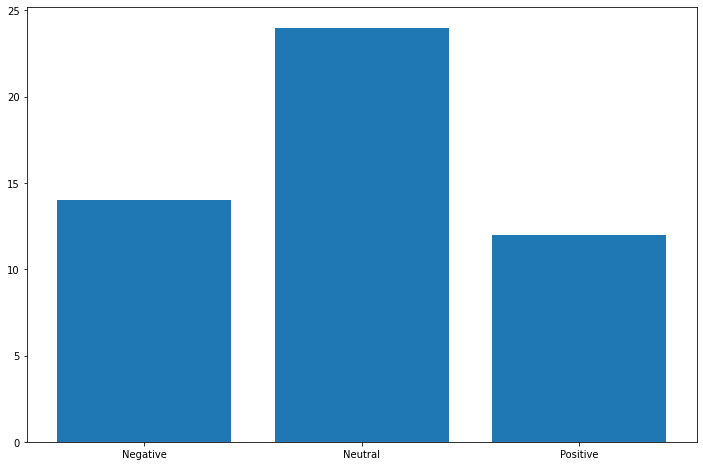

In [25]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

We can see how Negative, Neutral and Positive tweets spread on this account.

We can also visualise the same information by displaying the exact values of subjectivity and polatiry on the graph

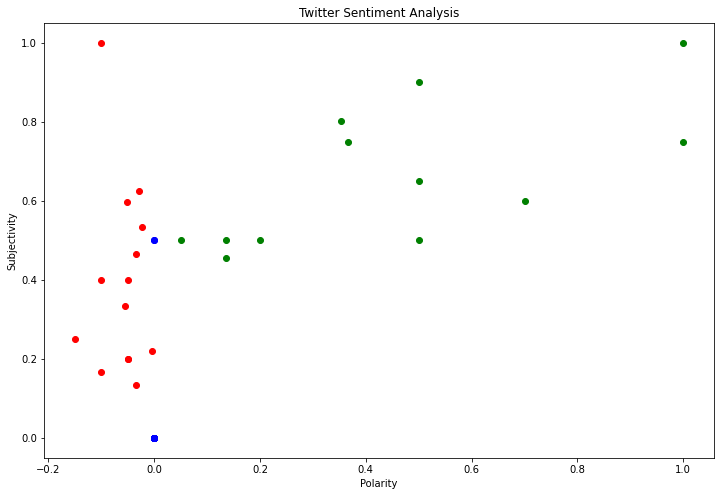

In [26]:
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()

We can also calculate the percentage of objective tweets.

In [27]:
objective = df[df['Subjectivity'] == 0]

print(str(objective.shape[0]/(df.shape[0])*100) + " % of objective tweets")

44.0 % of objective tweets


At the end we can also generate a wrod cloud to see the themes and most common words used in the tweets we were analysing

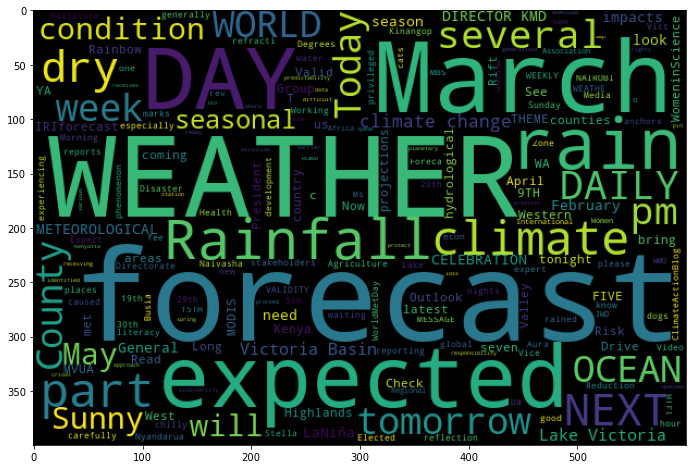

In [29]:
# Creating a word cloud
words = ' '.join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

Doing sentiment analysis of the tweets enabled us to calculate numerical values of subjectivity and polarity.

This could help us to understand better this Tweeter account in terms of the language that is being used.

Combining this with additional information about likes and comments can be very useful from marketing point of view and can enable us to find some correlation betweein subjectivity, polarity and the engagement our the users for a specified Tweeeter account